##### COMENZAMOS A ANALIZAR DATOS

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import squarify
import matplotlib.pyplot as plt

In [32]:
#Identificar cuales son las averías más repetitivas con las que nos podríamos encontrar si un vuelo se cancela por problemas técnicos

In [4]:
#Ahora podemos trabajar con la tabla y filtrar por los eventos que tengan ATA con tiempo de retraso asociado
eventos_retrasos = pd.read_csv("./Datos/Tablas/eventos_con_retrasos.csv", encoding= "latin1")
eventos_retrasos

,ID,Occurred,At,AC,Station,Headline,FlightNo,ATA,Minutos
0,12185,2021-01-02,18:59:00,AviÃ³n 1,PIQ,98254/1,NT421,77-00,38.0
1,12194,2021-01-03,20:15:00,AviÃ³n 2,PDQ,0097630/1,NT312,33-49,15.0
2,12200,2021-01-04,06:50:00,AviÃ³n 3,PIQ,MAINTENANCE ACTION WITHOUT PILOT REPORT - OPER...,414,25-65,3.0
3,12210,2021-01-04,14:13:00,AviÃ³n 3,PDQ,0096673/1,NT158,52-42,12.0
4,12217,2021-01-05,07:33:00,AviÃ³n 4,PIQ,OTHERS / NOT SPECIFIED - OPERATIONAL,NaN,33-00,8.0
...,...,...,...,...,...,...,...,...,...
6459,69075,2024-07-21,22:05:00,AviÃ³n 21,PDQ,PILOTO SOLICITA MANTENIMIENTO POR LATCH DEL CO...,NT349,NaN,14.0
6460,69091,2024-07-20,06:20:00,AviÃ³n 37,PDQ,SIN ACCION DE MTTO,NT300,NaN,10.0
6461,69092,2024-07-20,21:20:00,AviÃ³n 8,PDQ,SIN ACCION DE MTTO,NT849,NaN,8.0
6462,69094,2024-07-20,07:00:00,AviÃ³n 24,PDQ,SIN ACCION DE MTTO,NT6002,NaN,3.0


In [5]:
'''
# Función para reemplazar los primeros 6 caracteres
def reemplazar_primeros_seis(caracteres):
    if pd.notna(caracteres) and len(caracteres) > 6:
        return "Avion " + caracteres[6:].strip  # Concatena "avion" con el resto del string después de los primeros 6 caracteres
    return caracteres  # Devuelve el string original si es menor a 6 caracteres o es NaN

# Aplicar la función a la columna 'AC'
eventos_retrasos["AC"] = eventos_retrasos["AC"].apply(reemplazar_primeros_seis)

eventos_retrasos
'''
# Modificamos el campo de AC ya que tras haber creado la tabla no reconoce la tilde
eventos_retrasos["AC"] = "avion " + eventos_retrasos["AC"].str[6:]
eventos_retrasos

,ID,Occurred,At,AC,Station,Headline,FlightNo,ATA,Minutos
0,12185,2021-01-02,18:59:00,avion 1,PIQ,98254/1,NT421,77-00,38.0
1,12194,2021-01-03,20:15:00,avion 2,PDQ,0097630/1,NT312,33-49,15.0
2,12200,2021-01-04,06:50:00,avion 3,PIQ,MAINTENANCE ACTION WITHOUT PILOT REPORT - OPER...,414,25-65,3.0
3,12210,2021-01-04,14:13:00,avion 3,PDQ,0096673/1,NT158,52-42,12.0
4,12217,2021-01-05,07:33:00,avion 4,PIQ,OTHERS / NOT SPECIFIED - OPERATIONAL,NaN,33-00,8.0
...,...,...,...,...,...,...,...,...,...
6459,69075,2024-07-21,22:05:00,avion 21,PDQ,PILOTO SOLICITA MANTENIMIENTO POR LATCH DEL CO...,NT349,NaN,14.0
6460,69091,2024-07-20,06:20:00,avion 37,PDQ,SIN ACCION DE MTTO,NT300,NaN,10.0
6461,69092,2024-07-20,21:20:00,avion 8,PDQ,SIN ACCION DE MTTO,NT849,NaN,8.0
6462,69094,2024-07-20,07:00:00,avion 24,PDQ,SIN ACCION DE MTTO,NT6002,NaN,3.0


In [6]:
eventos_retrasos.info()
eventos_retrasos["ATA"]
eventos_retrasos.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6464 entries, 0 to 6463
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        6464 non-null   int64  
 1   Occurred  6464 non-null   object 
 2   At        6464 non-null   object 
 3   AC        6464 non-null   object 
 4   Station   5983 non-null   object 
 5   Headline  6464 non-null   object 
 6   FlightNo  5296 non-null   object 
 7   ATA       4524 non-null   object 
 8   Minutos   6446 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 454.6+ KB


ID             0
Occurred       0
At             0
AC             0
Station      481
Headline       0
FlightNo    1168
ATA         1940
Minutos       18
dtype: int64

In [7]:
sinnulos = eventos_retrasos[eventos_retrasos["ATA"].notnull()].copy()
sinnulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4524 entries, 0 to 6454
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        4524 non-null   int64  
 1   Occurred  4524 non-null   object 
 2   At        4524 non-null   object 
 3   AC        4524 non-null   object 
 4   Station   4168 non-null   object 
 5   Headline  4524 non-null   object 
 6   FlightNo  3704 non-null   object 
 7   ATA       4524 non-null   object 
 8   Minutos   4517 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 353.4+ KB


In [8]:
# Extraer los dos primeros caracteres de cada valor en la columna "ATA"
sinnulos["ATA Principal"] = sinnulos["ATA"].astype(str).str[:2]

# Contar las repeticiones de cada par de caracteres en la nueva columna
ata_counts = sinnulos["ATA Principal"].value_counts()

# Seleccionar los 5 valores más frecuentes
top_5_ata = ata_counts.head(5)
top_5_ata

ATA Principal
25    448
12    414
05    365
24    255
52    248
Name: count, dtype: int64

In [9]:
# Sumar todos los campos sin nulos
total_ata = sinnulos["ATA"].notnull().sum()
top_5_percentaje = (top_5_ata / total_ata) * 100
top_5_percentaje

ATA Principal
25    9.902741
12    9.151194
05    8.068081
24    5.636605
52    5.481874
Name: count, dtype: float64

In [10]:
# Las 5 averías más repetitivas representan el 38.24% del total
top_5_percentaje.sum()

38.240495137046864

In [11]:
# Identificar cuales son los 5 subcódigos más comunes en cada una de las ATA del top 5

# Extraer las filas donde los dos primeros caracteres de 'ATA' pertenecen a los cinco más comunes
top_ata_rows = sinnulos[sinnulos["ATA Principal"].isin(top_5_ata.index)]

# Contar las repeticiones completas de "ATA" dentro de estas filas
full_ata_counts = top_ata_rows["ATA"].value_counts()

# Para cada uno de los top 5 ATA , hallar los 5 subcódigos más comunes y sus porcentajes
top_5_subcodigos = {}
for ata in top_5_ata.index:
    specific_ata_rows = top_ata_rows[top_ata_rows["ATA Principal"] == ata]
    specific_ata_counts = specific_ata_rows["ATA"].value_counts()
    top_5_specific = specific_ata_counts.head(5)
    total_specific_ata = specific_ata_rows["ATA"].count()
    percentaje = (top_5_specific / total_specific_ata) * 100
    top_5_subcodigos[ata] = (top_5_specific, percentaje)

# Hemos creado un diccionario con los valores total y porcentajes de cada ATA
top_5_subcodigos

{'25': (ATA
  25-00    116
  25-21     71
  25-65     33
  25-26     21
  25-60     21
  Name: count, dtype: int64,
  ATA
  25-00    25.892857
  25-21    15.848214
  25-65     7.366071
  25-26     4.687500
  25-60     4.687500
  Name: count, dtype: float64),
 '12': (ATA
  12-11    158
  12-37     91
  12-28     49
  12-14     44
  12-13     20
  Name: count, dtype: int64,
  ATA
  12-11    38.164251
  12-37    21.980676
  12-28    11.835749
  12-14    10.628019
  12-13     4.830918
  Name: count, dtype: float64),
 '05': (ATA
  05-20    210
  05-51    113
  05-50     19
  05-00      8
  05-53      8
  Name: count, dtype: int64,
  ATA
  05-20    57.534247
  05-51    30.958904
  05-50     5.205479
  05-00     2.191781
  05-53     2.191781
  Name: count, dtype: float64),
 '24': (ATA
  24-32    61
  24-00    35
  24-31    28
  24-46    25
  24-22    23
  Name: count, dtype: int64,
  ATA
  24-32    23.921569
  24-00    13.725490
  24-31    10.980392
  24-46     9.803922
  24-22     9.019608
 

In [12]:
sinnulos["ATA"].describe()

count      4524
unique      421
top       05-20
freq        210
Name: ATA, dtype: object

In [13]:
# Copiamos dataframe original para analizar el tiempo de retraso originado por cada ATA
eventos_retrasos_copia = eventos_retrasos.copy()

# Ahora, seleccionamos todas las filas donde la columna ATA no tiene nulos
eventos_retrasos_sin_nulos = eventos_retrasos_copia[eventos_retrasos_copia["ATA"].notnull()]
eventos_retrasos_sin_nulos

,ID,Occurred,At,AC,Station,Headline,FlightNo,ATA,Minutos
0,12185,2021-01-02,18:59:00,avion 1,PIQ,98254/1,NT421,77-00,38.0
1,12194,2021-01-03,20:15:00,avion 2,PDQ,0097630/1,NT312,33-49,15.0
2,12200,2021-01-04,06:50:00,avion 3,PIQ,MAINTENANCE ACTION WITHOUT PILOT REPORT - OPER...,414,25-65,3.0
3,12210,2021-01-04,14:13:00,avion 3,PDQ,0096673/1,NT158,52-42,12.0
4,12217,2021-01-05,07:33:00,avion 4,PIQ,OTHERS / NOT SPECIFIED - OPERATIONAL,NaN,33-00,8.0
...,...,...,...,...,...,...,...,...,...
6447,68953,2024-07-19,19:00:00,avion 39,PDQ,2 ANOT: PARASOL CM1 Y ROLLER IZQ CM1,NT273,25-13,3.0
6449,68980,2024-07-20,06:25:00,avion 4,PDQ,MTTO SIN INFO,NT201,52-31,5.0
6451,69000,2024-07-20,14:27:00,avion 25,PIQ,SALTA AL ARRANCAR AVIONIC SINGLE SWITCH,NT141,42-11,30.0
6452,69007,2024-07-20,18:48:00,avion 25,PDQ,TEMPERATURA ALTA DE COMBUSTIBLE ENG #1,NT178,73-15,40.0


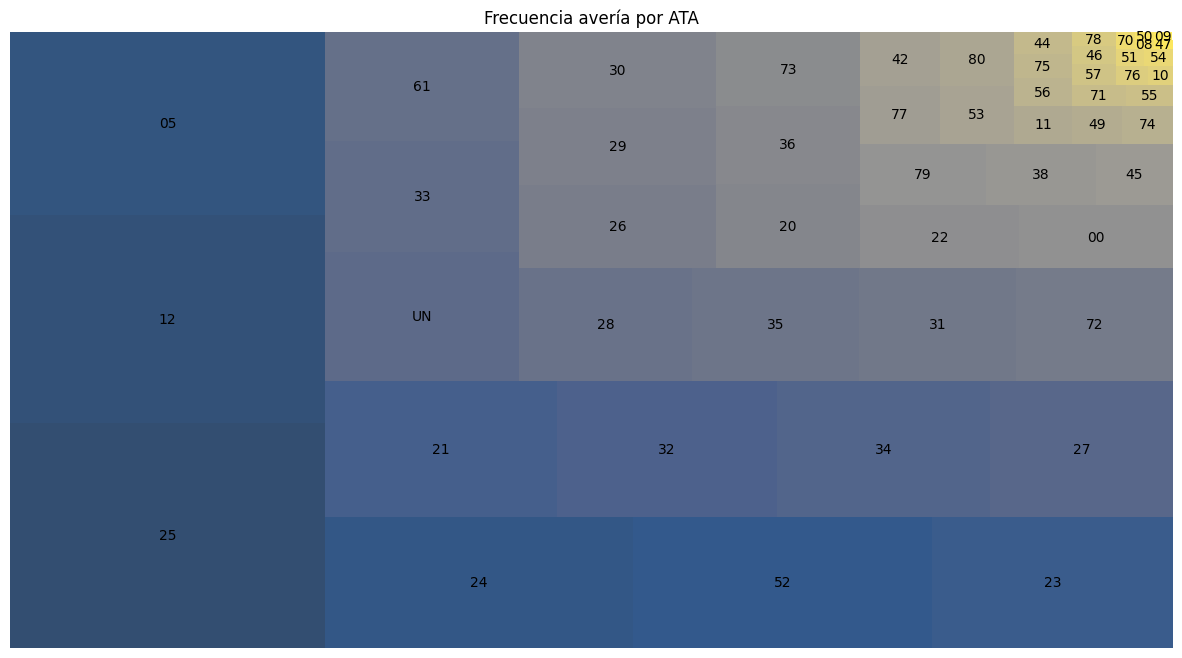

In [15]:
# Preparar los datos para el treemap

# Contar las repeticiones de cada par de caracteres en la columna "ATA Principal"
ata_counts_all = sinnulos["ATA Principal"].value_counts()
sizes_all = ata_counts_all.values
labels_all = ata_counts_all.index

# Crear el treemap para todas las "ATA Principal" values
plt.figure(figsize = (15,8))
squarify.plot(sizes = sizes_all, label=labels_all, alpha = 0.8, color = plt.cm.cividis(np.linspace(0, 1, len(labels_all))))
plt.title("Frecuencia avería por ATA")
plt.axis("off")
plt.savefig("./Datos/Imagenes/rango_de_ata.png")
plt.show()

In [16]:
ata_counts_all.info()

<class 'pandas.core.series.Series'>
Index: 52 entries, 25 to 09
Series name: count
Non-Null Count  Dtype
--------------  -----
52 non-null     int64
dtypes: int64(1)
memory usage: 832.0+ bytes


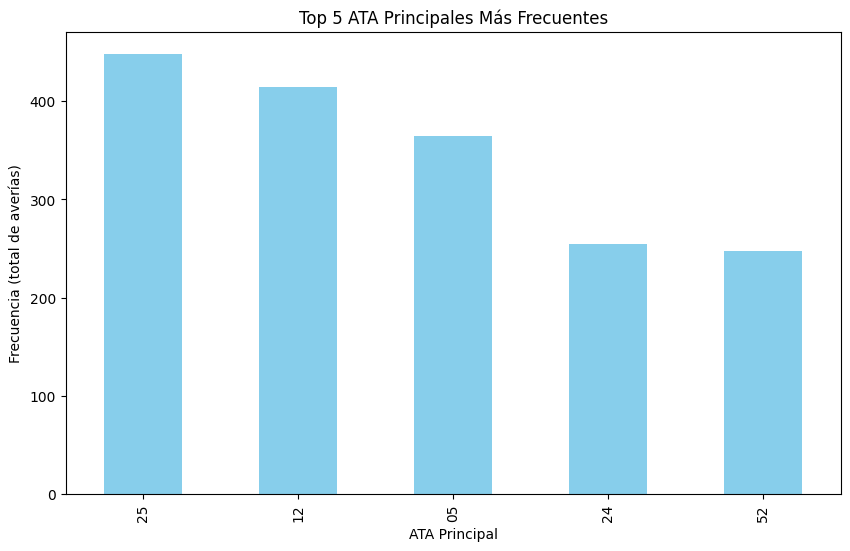

In [17]:
# Gráfico de barras
# Gráfico de barras de los ATA principales más frecuentes
plt.figure(figsize=(10, 6))
top_5_ata.plot(kind="bar", color="skyblue")
plt.title("Top 5 ATA Principales Más Frecuentes")
plt.xlabel("ATA Principal")
plt.ylabel("Frecuencia (total de averías)")
plt.savefig("./Datos/Imagenes/top_5_ata_mas_frecuentes.png")
plt.show()

# Este gráfico muestra la frecuencia de los 5 códigos ATA más comunes. Los códigos 25, 12, 05, 24, y 52 son los más frecuentes en el conjunto de datos.

In [18]:
# Verifica el tipo de datos de la columna "Occurred"
print(eventos_retrasos["Occurred"].dtype)

object


In [19]:
# Identificar la cantidad total de los ATA más frecuentes por cada año desde 2021 hasta 2024
sinnulos["Year"] = pd.to_datetime(sinnulos["Occurred"]).dt.year
ata_por_año = sinnulos[sinnulos["ATA Principal"].isin(top_5_ata.index)].groupby(["Year", "ATA Principal"]).size().unstack(fill_value=0)

# Sumar los minutos de retraso por cada ATA y cada año
ata_minutos_por_año = sinnulos[sinnulos["ATA Principal"].isin(top_5_ata.index)].groupby(["Year", "ATA Principal"])["Minutos"].sum().unstack(fill_value=0)
ata_por_año

ATA Principal,05,12,24,25,52
Year,,,,,
2021,57,53,64,81,72
2022,113,106,69,128,71
2023,100,108,82,145,76
2024,95,147,40,94,29


In [23]:
ata_minutos_por_año

ATA Principal,05,12,24,25,52
Year,,,,,
2021,2934.0,768.0,3216.0,1263.0,1421.0
2022,6466.0,2733.0,4544.0,2356.0,2502.0
2023,6613.0,2798.0,5372.0,2554.0,1873.0
2024,4314.0,2917.0,2585.0,3139.0,829.0


In [22]:
ata_minutos_por_año.sum(axis=1).reset_index(name="Total Minutos")

,Year,Total Minutos
0,2021,9602.0
1,2022,18601.0
2,2023,19210.0
3,2024,13784.0


In [30]:
ata_minutos_por_año.sum(axis=0).reset_index(name="Total Minutos")

,ATA Principal,Total Minutos
0,05,20327.0
1,12,9216.0
2,24,15717.0
3,25,9312.0
4,52,6625.0


C:\Users\Victor\AppData\Local\Temp\ipykernel_8856\1635540971.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total Minutos", y="ATA Principal", data=total_minutos_por_ata, palette="viridis")


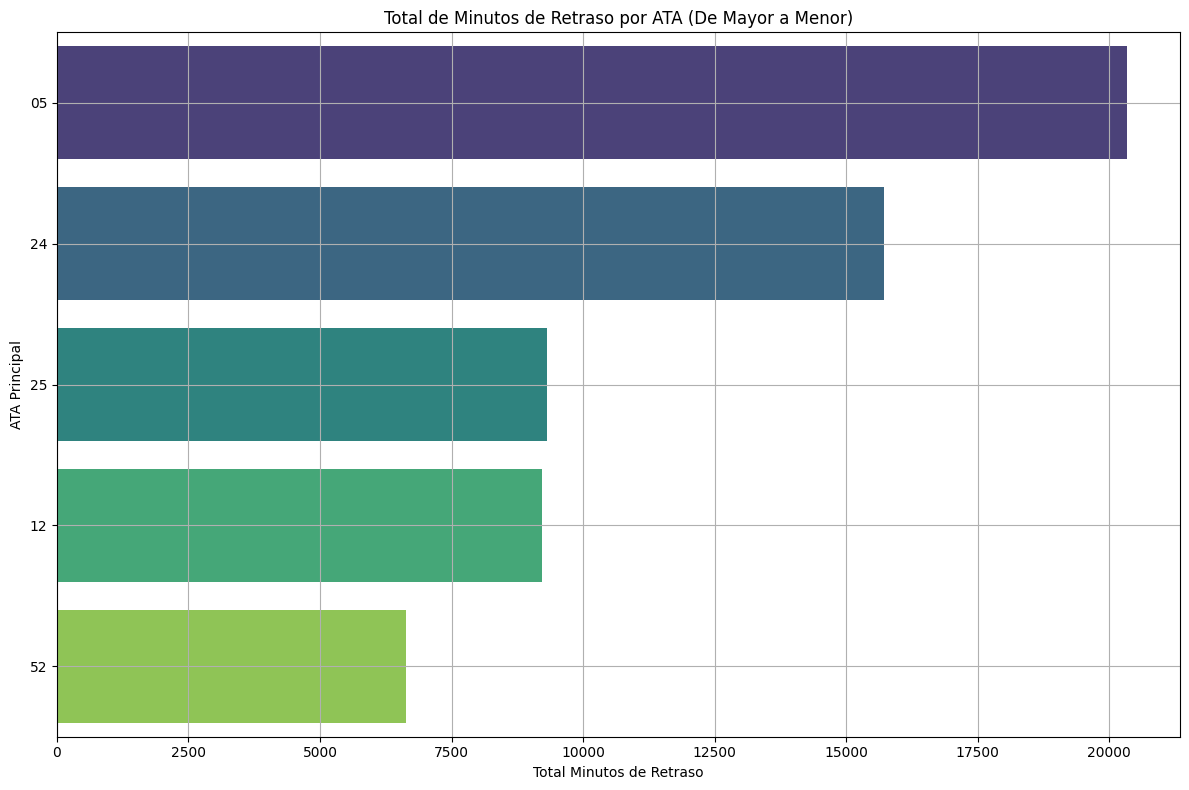

In [29]:
# Calcular número total de minutos de cada ATA
total_minutos_por_ata= ata_minutos_por_año.sum(axis=0).reset_index(name="Total Minutos")
# Ordenar los resultados de mayor a menor
total_minutos_por_ata = total_minutos_por_ata.sort_values(by="Total Minutos", ascending=False)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(12, 8))
sns.barplot(x="Total Minutos", y="ATA Principal", data=total_minutos_por_ata, palette="viridis")
plt.title("Total de Minutos de Retraso por ATA (De Mayor a Menor)")
plt.xlabel("Total Minutos de Retraso")
plt.ylabel("ATA Principal")
plt.grid(True)
plt.tight_layout()
plt.savefig("./Datos/Imagenes/total_minutos_retraso_por_ata.png")
plt.show()

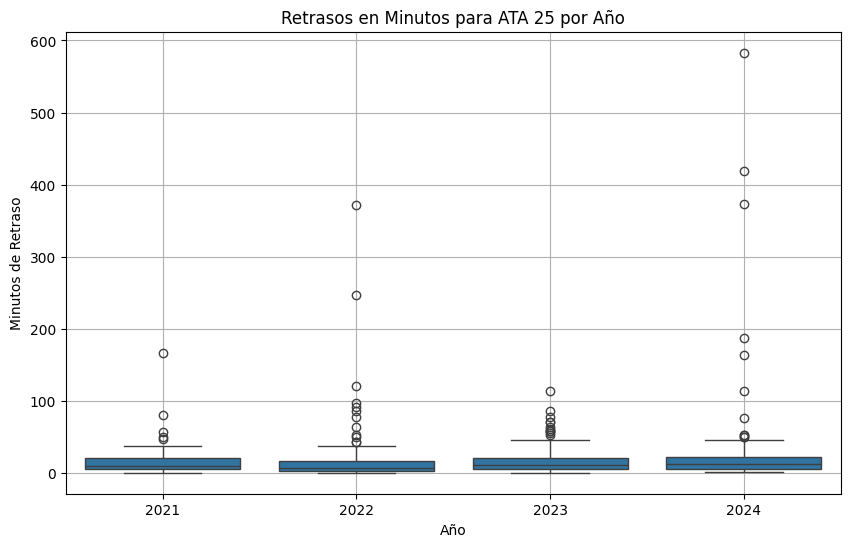

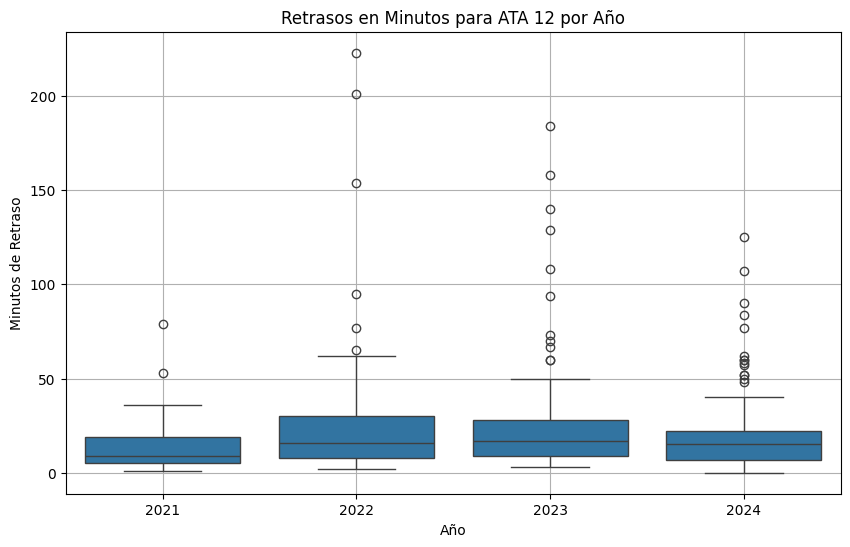

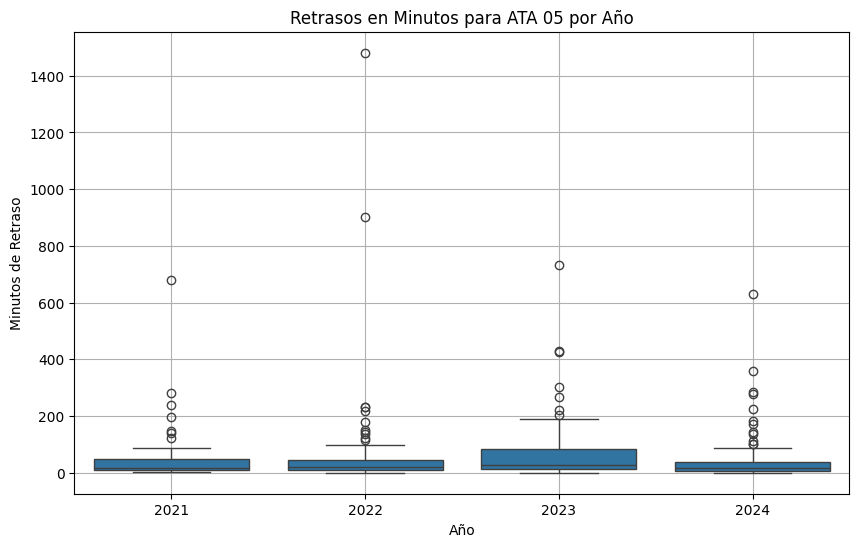

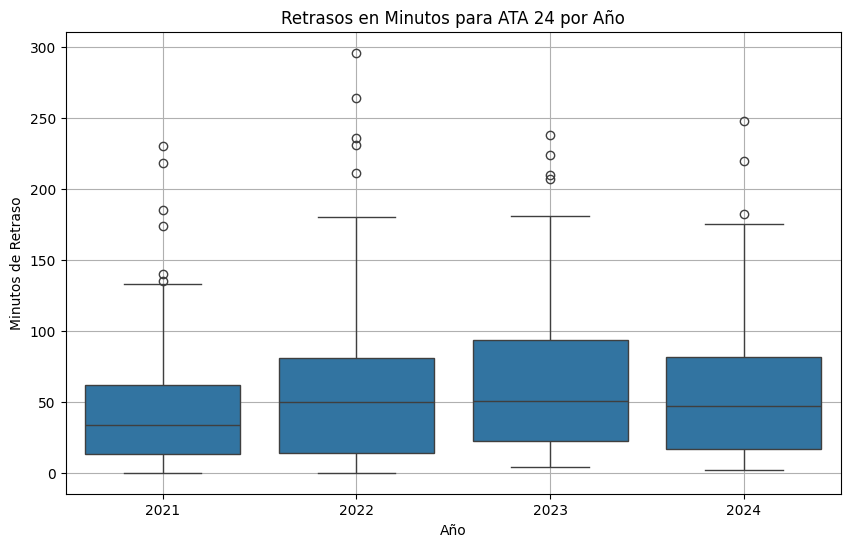

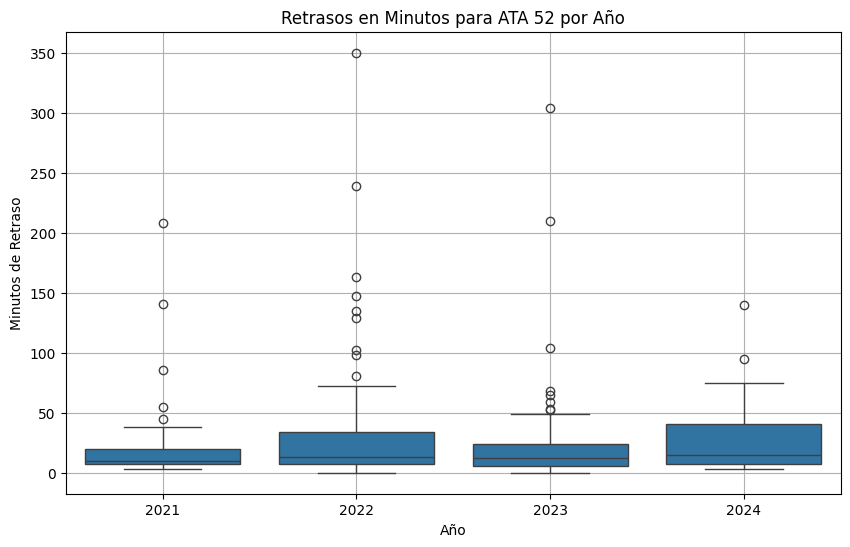

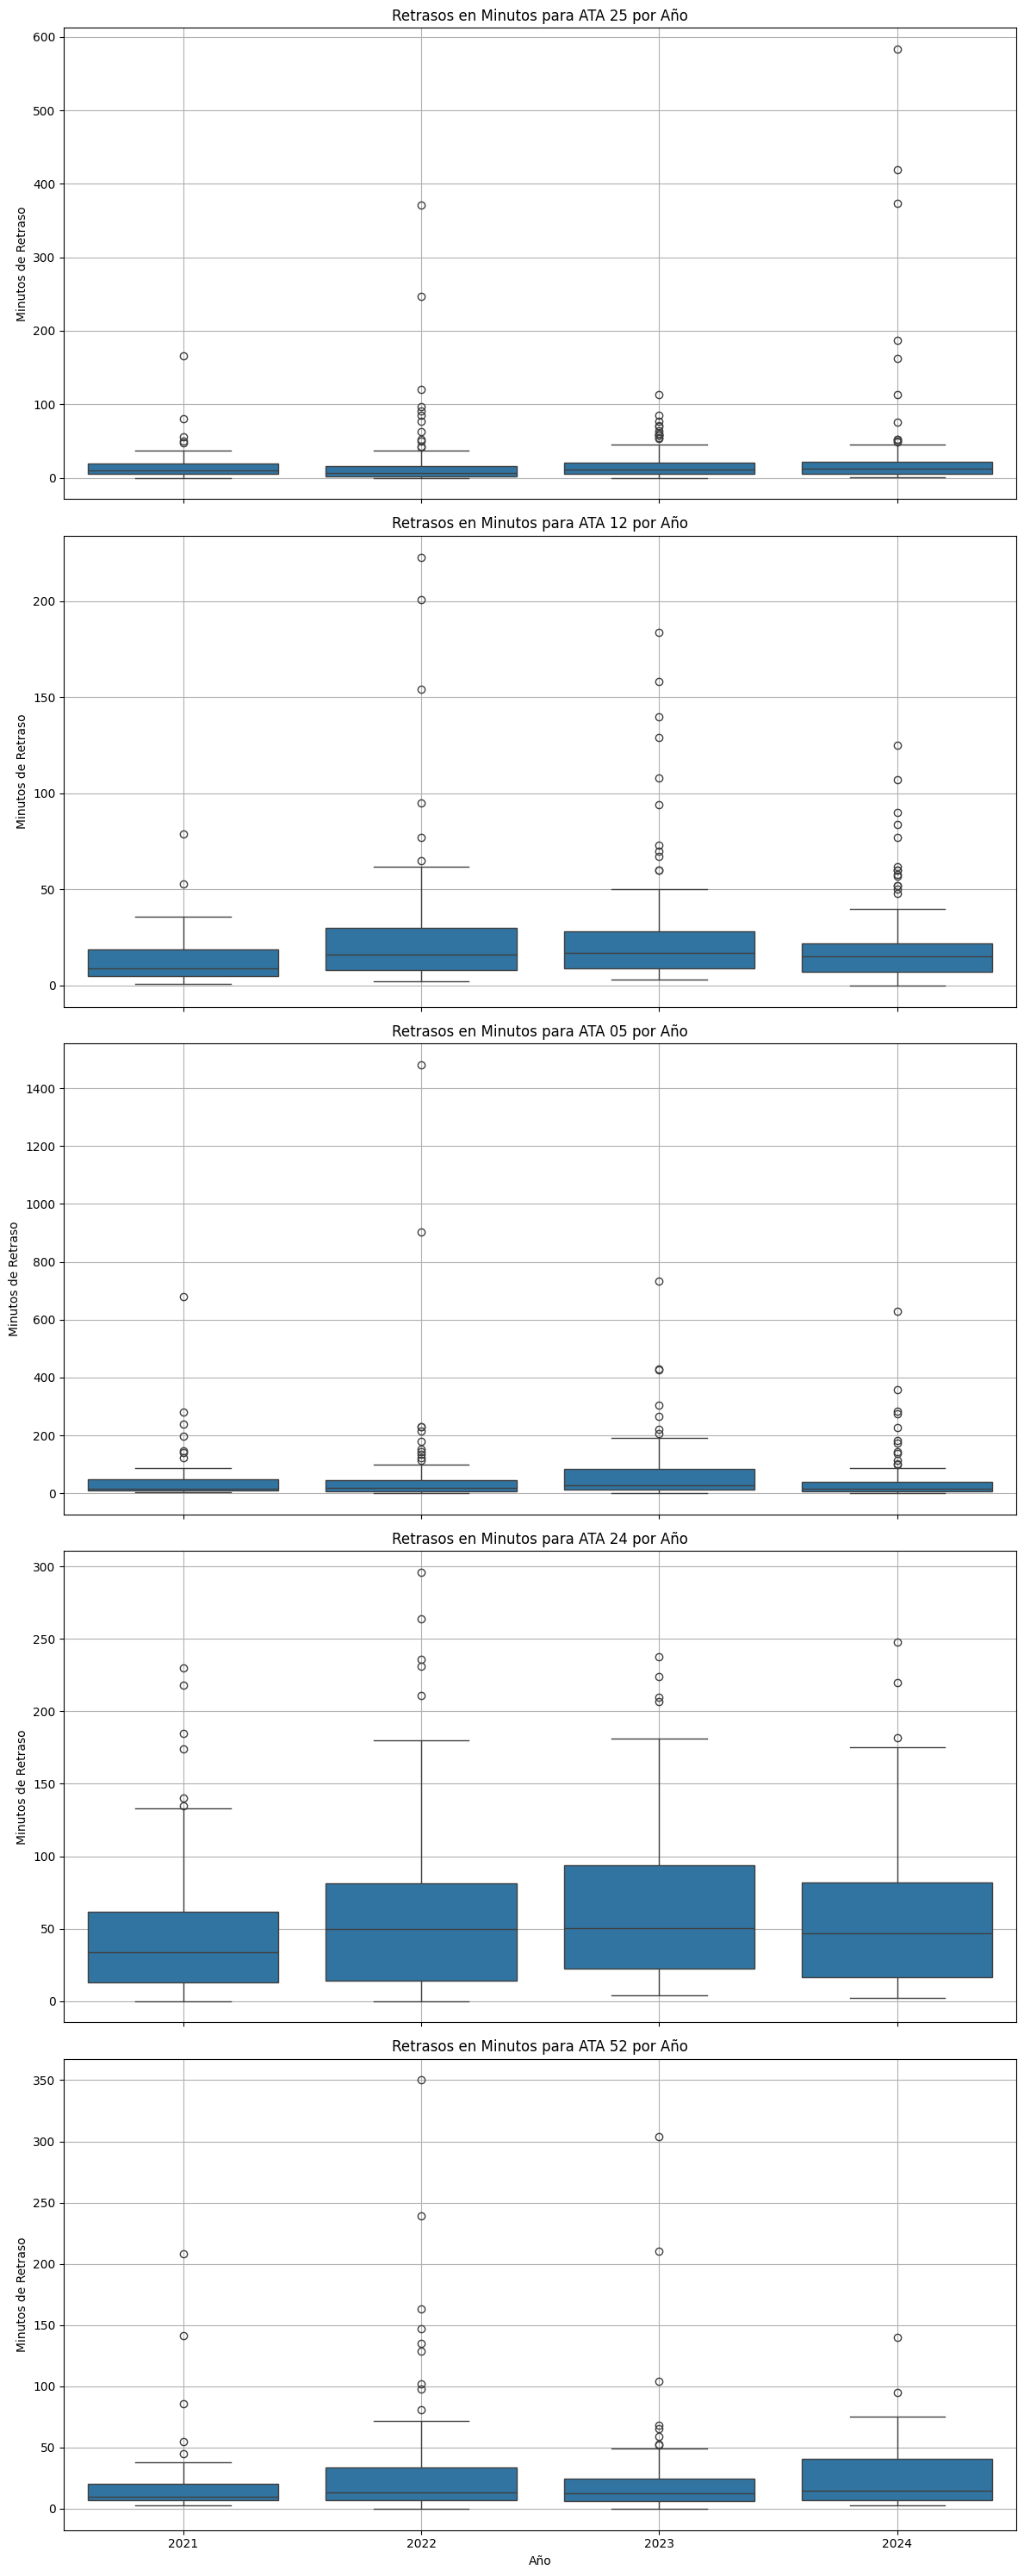

'\nATA 25:\nDistribución: La mediana del número de averías parece ser relativamente constante a lo largo de los años, pero con algunos valores extremos (outliers) notables en 2024.\nVariabilidad:\n2021-2023: Relativamente baja, con cajas (IQR) más pequeñas y bigotes cortos, indicando que los datos están agrupados estrechamente alrededor de la mediana.\n2024: Mayor variabilidad con algunos outliers significativos, lo que sugiere que hubo algunos años con un número de averías excepcionalmente alto.\nTendencia General: La mediana del número de averías para ATA 25 se mantiene relativamente constante de 2021 a 2023, con una ligera disminución en 2024.\nOutliers: En 2024, se observa un aumento significativo de outliers, lo que indica un año con variaciones atípicas y más averías extremas.\n\nATA 12 \nDistribución: La mediana del número de averías muestra cierta variabilidad en comparación al ATA 25, especialmente con valores extremos en 2022 y 2023.\nVariabilidad:\n2021 y 2024: Baja variabil

In [49]:
# Crear gráfico de boxplots independientes
for ata in top_5_ata.index:
    plt.figure(figsize = (10, 6))
    sns.boxplot(data=sinnulos[sinnulos["ATA Principal"] == ata], x = "Year", y = "Minutos")
    plt.title(f"Retrasos en Minutos para ATA {ata} por Año")
    plt.xlabel("Año")
    plt.ylabel("Minutos de Retraso")
    plt.grid(True)
    plt.savefig("./Datos/Imagenes/box_plots_independienes.png")
    plt.show()

# Crear una figura con 5 subplots
fig, axes = plt.subplots(5, 1, figsize=(12, 30), sharex=True)

for idx, ata in enumerate(top_5_ata.index):
    sns.boxplot(data=sinnulos[sinnulos["ATA Principal"] == ata], x = "Year", y = "Minutos", ax=axes[idx])
    axes[idx].set_title(f"Retrasos en Minutos para ATA {ata} por Año")
    axes[idx].set_xlabel("Año")
    axes[idx].set_ylabel("Minutos de Retraso")
    axes[idx].grid(True)
    plt.savefig("./Datos/Imagenes/figura_box_plots.png")

plt.tight_layout()
plt.show()

#COMENTARIOS
'''
ATA 25:
Distribución: La mediana del número de averías parece ser relativamente constante a lo largo de los años, pero con algunos valores extremos (outliers) notables en 2024.
Variabilidad:
2021-2023: Relativamente baja, con cajas (IQR) más pequeñas y bigotes cortos, indicando que los datos están agrupados estrechamente alrededor de la mediana.
2024: Mayor variabilidad con algunos outliers significativos, lo que sugiere que hubo algunos años con un número de averías excepcionalmente alto.
Tendencia General: La mediana del número de averías para ATA 25 se mantiene relativamente constante de 2021 a 2023, con una ligera disminución en 2024.
Outliers: En 2024, se observa un aumento significativo de outliers, lo que indica un año con variaciones atípicas y más averías extremas.

ATA 12 
Distribución: La mediana del número de averías muestra cierta variabilidad en comparación al ATA 25, especialmente con valores extremos en 2022 y 2023.
Variabilidad:
2021 y 2024: Baja variabilidad, con cajas y bigotes más cortos.
2022-2023: Mayor variabilidad, con presencia de varios outliers, indicando años con variaciones significativas en el número de averías.
Tendencia General: La mediana de averías para ATA 12 muestra una variación más pronunciada, especialmente con un aumento en 2022 y 2023, seguido de una reducción en 2024.
Outliers: Los outliers son más prominentes en 2022 y 2023, sugiriendo picos en el número de averías en estos años.

ATA 05:
Distribución: La mediana del número de averías es bastante consistente, aunque hay algunos outliers notables.
Variabilidad:
2021-2023: Moderada, con cajas relativamente uniformes pero con algunos outliers en 2022 y 2023.
2024: Baja variabilidad, con una caja más pequeña y menos dispersión.
Tendencia General: La mediana del número de averías para ATA 05 es bastante consistente, aunque hay un ligero aumento en la variabilidad a lo largo de los años.
Outliers: Hay algunos outliers significativos, especialmente en 2022 y 2023, indicando años con picos de averías.

ATA 24:
Distribución: La mediana del número de averías muestra cierta consistencia, aunque hay variaciones en la distribución de los datos.
Variabilidad:
2021 y 2024: Baja, con cajas y bigotes más cortos.
2022-2023: Mayor variabilidad, especialmente en 2022 con outliers significativos.
Tendencia General: La mediana de averías para ATA 24 muestra consistencia, aunque hay fluctuaciones en la distribución de los datos.
Outliers: 2022 y 2023 presentan outliers significativos, lo que sugiere años con variaciones atípicas.

ATA 52:
Distribución: La mediana del número de averías muestra una tendencia a la baja, con valores extremos en algunos años.
Variabilidad:
2021 y 2024: Baja, con cajas y bigotes más cortos.
2022-2023: Alta, con presencia de varios outliers, indicando años con variaciones significativas en el número de averías.
Tendencia General: La mediana del número de averías para ATA 52 tiende a ser más baja en 2024 comparado con los años anteriores.
Outliers: Los años 2022 y 2023 tienen varios outliers, indicando picos en el número de averías.

Conclusiones Generales:
Consistencia: Algunas ATA muestran una mayor consistencia en el número de averías a lo largo de los años, como el ATA 25.
Variabilidad: Otras ATA, como 12 y 52, muestran una mayor variabilidad, con varios años presentando outliers significativos.
Outliers: La presencia de outliers en varios ATA sugiere que hubo años con un número de averías inusualmente alto, lo cual podría ser investigado más a fondo para entender las causas subyacentes.
Tendencias: No se observa una tendencia clara ascendente o descendente en el número de averías para todos los ATA, pero la variabilidad y los outliers destacan ciertos años con eventos excepcionales.
'''




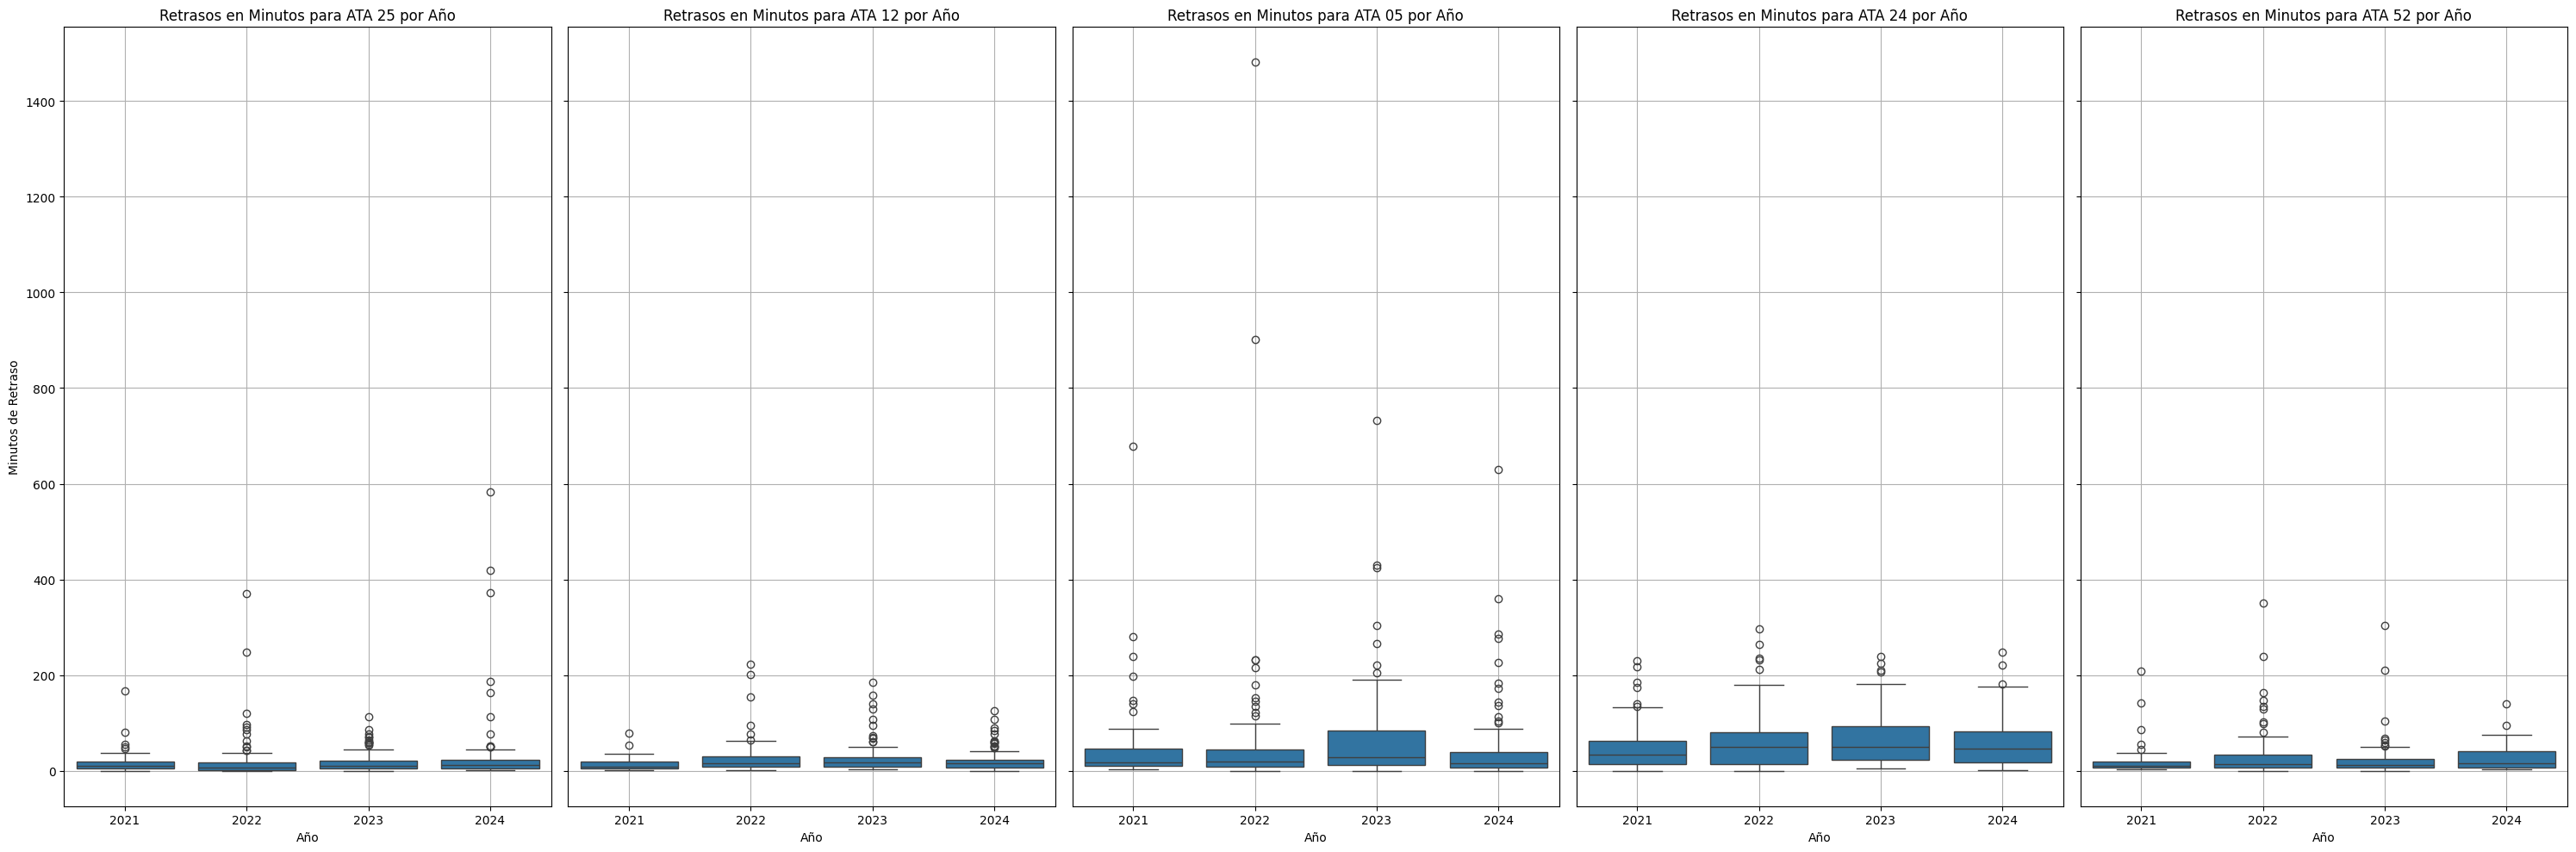

In [51]:
# El mismo pero en vertical para añadirlo a la presentación

fig, axes = plt.subplots(1, 5, figsize=(30, 10), sharey=True)

for idx, ata in enumerate(top_5_ata.index):
    sns.boxplot(data=sinnulos[sinnulos["ATA Principal"] == ata], x="Year", y="Minutos", ax=axes[idx])
    axes[idx].set_title(f"Retrasos en Minutos para ATA {ata} por Año")
    axes[idx].set_xlabel("Año")
    axes[idx].set_ylabel("Minutos de Retraso")
    axes[idx].grid(True)

plt.tight_layout()
plt.savefig("./Datos/Imagenes/figura_box_plots_horizontal.png")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ATA      152 non-null    object 
 1   Year     152 non-null    int64  
 2   Minutos  152 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.7+ KB
None
              Year      Minutos
count   152.000000   152.000000
mean   2022.664474   169.427632
std       1.054439   172.701388
min    2021.000000    42.000000
25%    2022.000000    66.500000
50%    2023.000000   124.000000
75%    2024.000000   212.250000
max    2024.000000  1481.000000
  ATA  Year  Minutos
0  25  2021     56.0
1  25  2021    166.0
2  25  2021     50.0
3  25  2021     47.0
4  25  2021     80.0


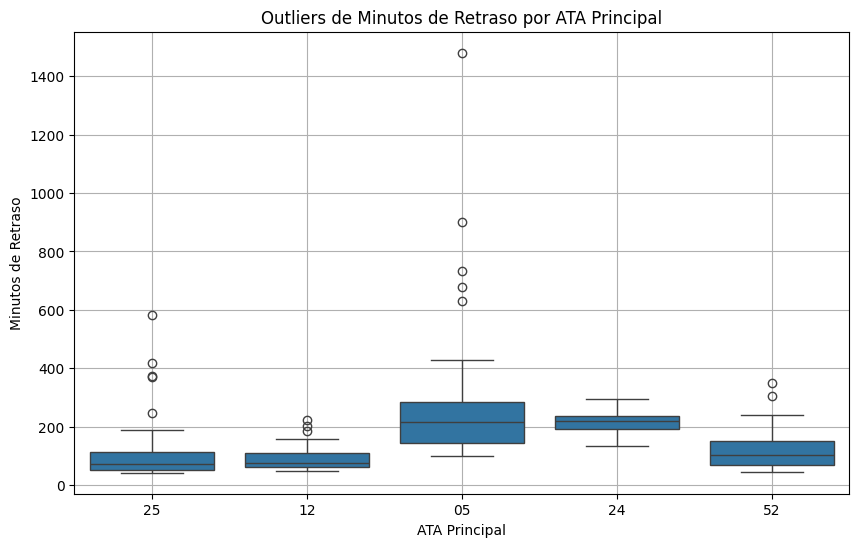

'\nATA 25:\n\nLa mayoría de los outliers están por encima del tercer cuartil (Q3), con algunos valores extremadamente altos.\nLa variabilidad de los minutos de retraso es significativa, indicando que los eventos con este código pueden tener retrasos muy variables.\nATA 12:\n\nLos outliers presentan una amplia gama de minutos de retraso, con algunos valores muy elevados.\nLa dispersión de los datos sugiere que los retrasos con este ATA también son bastante variables.\nATA 05:\n\nEste código tiene varios outliers, algunos de los cuales son valores extremadamente altos.\nLa mediana de los outliers parece estar en un rango moderado comparado con otros ATA.\nATA 24:\n\nLos outliers en este grupo también muestran una amplia variabilidad en los minutos de retraso.\nAlgunos valores son bastante extremos, indicando eventos con retrasos significativamente largos.\nATA 52:\n\nLos outliers presentan una menor dispersión comparada con otros ATA, aunque hay algunos valores muy altos.\nLa concentraci

In [53]:
#Outliers ATA principales 

sinnulos["Year"] = pd.to_datetime(sinnulos["Occurred"]).dt.year
# Función para identificar outliers en una serie de datos
def identify_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Identificar outliers para cada ATA y año
outliers = {}

for ata in ['25', '12', '05', '24', '52']:
    outliers[ata] = {}
    for year in range(2021, 2025):
        ata_year_data = sinnulos[(sinnulos["ATA Principal"] == ata) & (sinnulos["Year"] == year)]["Minutos"]
        ata_year_outliers = identify_outliers(ata_year_data.dropna())
        outliers[ata][year] = ata_year_outliers

# Convertir los outliers a un dataframe para un análisis más detallado
outliers_df = pd.DataFrame([(ata, year, minute) for ata in outliers for year in outliers[ata] for minute in outliers[ata][year]], columns=["ATA", "Year", "Minutos"])

# Mostrar la información de los outliers identificados
print(outliers_df.info())
print(outliers_df.describe())
print(outliers_df.head())

# Guardar el DataFrame de outliers a un archivo CSV para su revisión
outliers_df.to_csv("./datos/tablas/outliers_eventos_retrasos.csv", index = False)

# Visualizar los outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x= "ATA", y = "Minutos", data=outliers_df)
plt.title("Outliers de Minutos de Retraso por ATA Principal")
plt.xlabel("ATA Principal")
plt.ylabel("Minutos de Retraso")
plt.grid(True)
plt.savefig("./Datos/Imagenes/outliers.png")
plt.show()

'''
ATA 25:

La mayoría de los outliers están por encima del tercer cuartil (Q3), con algunos valores extremadamente altos.
La variabilidad de los minutos de retraso es significativa, indicando que los eventos con este código pueden tener retrasos muy variables.
ATA 12:

Los outliers presentan una amplia gama de minutos de retraso, con algunos valores muy elevados.
La dispersión de los datos sugiere que los retrasos con este ATA también son bastante variables.
ATA 05:

Este código tiene varios outliers, algunos de los cuales son valores extremadamente altos.
La mediana de los outliers parece estar en un rango moderado comparado con otros ATA.
ATA 24:

Los outliers en este grupo también muestran una amplia variabilidad en los minutos de retraso.
Algunos valores son bastante extremos, indicando eventos con retrasos significativamente largos.
ATA 52:

Los outliers presentan una menor dispersión comparada con otros ATA, aunque hay algunos valores muy altos.
La concentración de outliers sugiere que los eventos con este ATA pueden ser más consistentes en términos de retraso, pero con algunos casos excepcionales.
Conclusiones
Variabilidad de Retrasos:

Los códigos ATA presentan una alta variabilidad en los minutos de retraso, con varios valores atípicos que indican eventos con retrasos significativamente más largos que el promedio.
Esto sugiere que ciertos tipos de problemas o incidentes pueden llevar a retrasos mucho mayores en comparación con otros.
Identificación de Problemas Críticos:

Los outliers identificados para cada ATA pueden indicar problemas críticos específicos que requieren atención particular.
Los valores extremos deben ser investigados para identificar las causas subyacentes y potencialmente mitigar futuros retrasos.
Análisis Específico por Año:

Un análisis adicional desglosado por año podría proporcionar información sobre cómo han evolucionado estos retrasos con el tiempo y si hay tendencias emergentes o mejoras en la gestión de ciertos tipos de problemas.
Acciones Correctivas:

Las áreas con mayor variabilidad y retrasos extremos podrían beneficiarse de acciones correctivas específicas. 
Esto puede incluir cambios en los procesos de mantenimiento, mejoras en la formación del personal, o inversiones en tecnología para detectar y resolver problemas más rápidamente.

'''

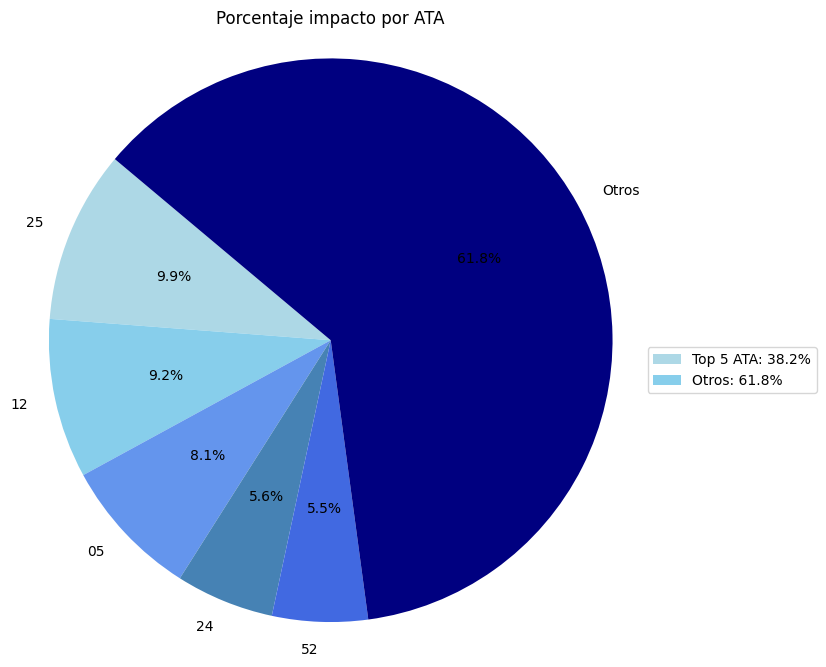

'\nAnálisis del Gráfico Circular\n\nEl gráfico circular muestra la distribución de los principales códigos ATA en comparación con todos los demás ATA combinados, utilizando una variedad de colores desde azul claro hasta azul oscuro.\n\nPorcentajes de los ATA Principales y Otros:\nATA 25: 9.90%\nATA 12: 9.15%\nATA 05: 8.07%\nATA 24: 5.64%\nATA 52: 5.48%\nOtros: 61.76%\nConclusiones\nDominancia de Otros ATA: Aunque los cinco ATA principales representan una porción significativa de los eventos, la categoría "Otros" constituye la mayoría, con el 61.76% del total. Esto indica que hay una gran diversidad de problemas que no están concentrados en los cinco ATA principales.\n\nFrecuencia de los Principales ATA: Los códigos ATA 25, 12, 05, 24, y 52 son los más recurrentes, pero cada uno de ellos individualmente representa menos del 10% del total de eventos.\n\nDiversidad de Problemas: La gran proporción de "Otros" sugiere que hay muchos tipos diferentes de problemas que ocurren con menor frecue

In [ ]:
#Seguimos en el análisis con el porcentaje que represtan el total de las averías principales frente al resto.

# Porcentaje de cada uno de los ATA principales y el resto
ata_counts = sinnulos["ATA Principal"].value_counts()
top_5_ata_counts = ata_counts.head(5)
otros_ata = ata_counts[5:].sum()

# Serie para los datos del gráfico circular
ata_data = pd.concat([top_5_ata_counts, pd.Series({"Otros": otros_ata})])
ata_data_porcentaje = (ata_data / ata_data.sum()) * 100


total_principal = ata_data_porcentaje.head(5).sum() # Calcular el porcentaje total de las ATA principales sumadas y otros
total_otros = ata_data_porcentaje["Otros"]

# Los colores en variedad de azul claro a azul oscuro
colors = ["#ADD8E6", "#87CEEB", "#6495ED", "#4682B4", "#4169E1", "#000080"]

# Graficar el gráfico circular con los colores definidos
plt.figure(figsize = (8, 8))
plt.pie(ata_data_porcentaje, labels=ata_data_porcentaje.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Porcentaje impacto por ATA")
plt.axis("equal")  # Para asegurar que el gráfico sea un círculo
plt.legend(       # Añadir leyenda con el porcentaje total fuera del círculo a la derecha
    labels = [f"Top 5 ATA: {total_principal:.1f}%", f"Otros: {total_otros:.1f}%"],
    loc = "upper left",
    bbox_to_anchor = (1, 0.5)
)
plt.savefig("./Datos/Imagenes/porcentaje_ata_mas_frecuentes.png")
plt.show()

ata_data_porcentaje

'''
Análisis del Gráfico Circular

El gráfico circular muestra la distribución de los principales códigos ATA en comparación con todos los demás ATA combinados, utilizando una variedad de colores desde azul claro hasta azul oscuro.

Porcentajes de los ATA Principales y Otros:
ATA 25: 9.90%
ATA 12: 9.15%
ATA 05: 8.07%
ATA 24: 5.64%
ATA 52: 5.48%
Otros: 61.76%
Conclusiones
Dominancia de Otros ATA: Aunque los cinco ATA principales representan una porción significativa de los eventos, 
la categoría "Otros" constituye la mayoría, con el 61.76% del total. 
Esto indica que hay una gran diversidad de problemas que no están concentrados en los cinco ATA principales.

Frecuencia de los Principales ATA: Los códigos ATA 25, 12, 05, 24, y 52 son los más recurrentes,
pero cada uno de ellos individualmente representa menos del 10% del total de eventos.

Diversidad de Problemas: La gran proporción de "Otros" sugiere que hay muchos tipos diferentes 
de problemas que ocurren con menor frecuencia, lo que podría requerir un enfoque más amplio 
en la gestión y solución de estos problemas.

Recomendaciones
Enfoque en Diversidad de Problemas: Aunque es importante gestionar y 
resolver los problemas más frecuentes representados por los ATA principales, 
también es crucial prestar atención a la amplia variedad de otros problemas menos frecuentes 
pero igualmente significativos.

Análisis Detallado de "Otros": Realizar un análisis más detallado de la categoría 
"Otros" podría revelar patrones adicionales y áreas de mejora que no son evidentes 
al centrarse solo en los ATA más comunes.

Monitoreo Continuo y Mejora: Establecer un sistema de monitoreo continuo para todos 
los códigos ATA, no solo los principales, puede ayudar a identificar y mitigar problemas 
emergentes de manera oportuna.

'''




C:\Users\Victor\AppData\Local\Temp\ipykernel_9148\2566921021.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = bubble_data, x = "Station", y = "ATA Principal", size= "Counts", sizes = (20, 200), legend =False, palette = "Blues")


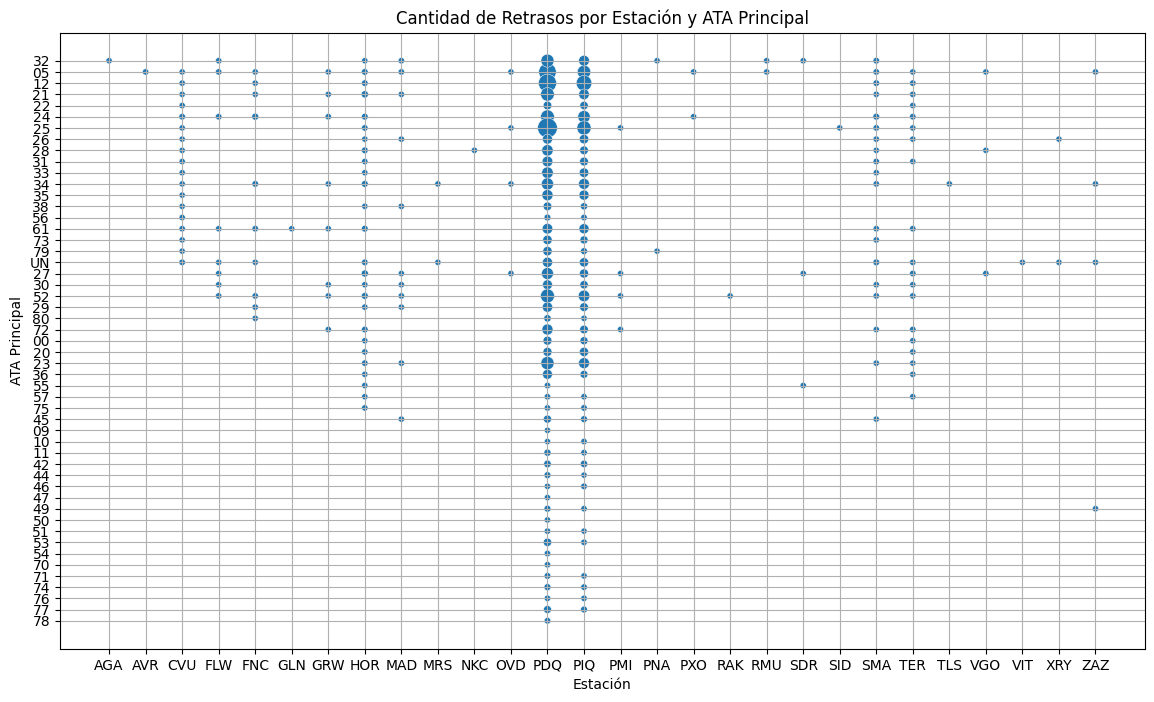

'\nAnálisis de datos\nPodemos identificar que dos estaciones tienen un número mayor de eventos en una amplia variedad de ATA que el resto de estaciones.\n#sto podría ser un indicador de que estas estaciones tienen un mayor riesgo de que el vuelo que cojamos pueda sufrir retraso.\nAdemás hemos identificado que estas estaciones son las bases principales donde se realiza el mantenimiento de las aeronaves.\nTambién distinguimos que hay puntos más grandes o más oscuros en las bases principales\n'

In [59]:
# Analisis bivariante

'''
Siguiendo con el análisis queremos identificar en que station o aeropuerto tendríamos mayor probabilidad de sufrir un retraso en nuestro vuelo 
y que cantidad corresponden en de las ATA principales en las bases con mayor retraso.

'''

stations_data = sinnulos[sinnulos["Station"].notnull()] # Solo las estaciones sin nulos 

# Gráfico de dispersión

plt.figure(figsize = (14, 8))
bubble_data = stations_data.groupby(["Station", "ATA Principal"]).size().reset_index(name = "Counts")
sns.scatterplot(data = bubble_data, x = "Station", y = "ATA Principal", size= "Counts", sizes = (20, 200), legend =False, palette = "Blues")
plt.title("Cantidad de Retrasos por Estación y ATA Principal")
plt.xlabel("Estación")
plt.ylabel("ATA Principal")
plt.grid(True)
plt.savefig("./Datos/Imagenes/dispersion_estacion_ata.png")
plt.show()
'''
Análisis de datos
Podemos identificar que dos estaciones tienen un número mayor de eventos en una amplia variedad de ATA que el resto de estaciones.
#sto podría ser un indicador de que estas estaciones tienen un mayor riesgo de que el vuelo que cojamos pueda sufrir retraso.
Además hemos identificado que estas estaciones son las bases principales donde se realiza el mantenimiento de las aeronaves.
También distinguimos que hay puntos más grandes o más oscuros en las bases principales
'''

In [60]:
# Estaciones con mayor cantidad de retrasos
# Mostrar las estaciones con más retrasos

# Agrupar y contar los retrasos por estación
station_retrasos = stations_data.groupby("Station").size().reset_index(name="Counts")

# Ordenar por el número de retrasos en orden descendente
station_retrasos = station_retrasos.sort_values(by="Counts", ascending=False)


# Mostrar las estaciones con más retrasos
top_stations = station_retrasos.head(10)

# Convertir los datos a un DataFrame para su visualización
top_stations_df = pd.DataFrame(top_stations)

top_stations_df

,Station,Counts
12,PDQ,2457
13,PIQ,1417
7,HOR,89
21,SMA,47
22,TER,32
2,CVU,25
4,FNC,24
8,MAD,16
3,FLW,13
6,GRW,9


C:\Users\Victor\AppData\Local\Temp\ipykernel_9148\4244860920.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_station_names, y=top_station_percentages.values, palette="coolwarm")


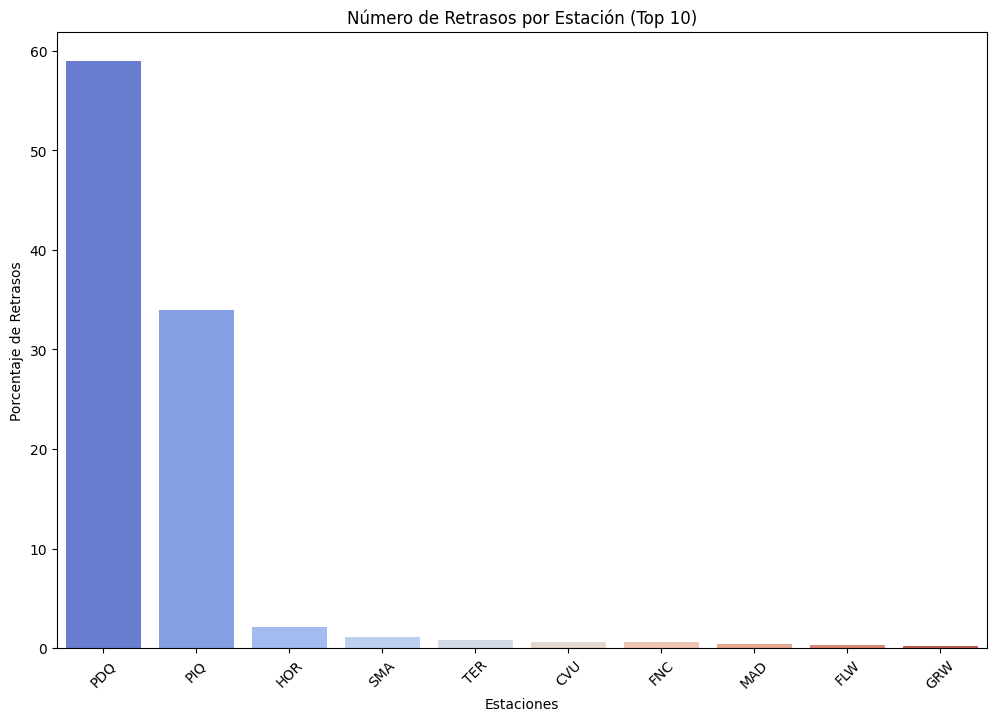

In [75]:
# Gráfico por base con mayor cantidad ed retraso
# Crear un gráfico de barras de las estaciones con más retrasos

# Calcular el porcentaje de retrasos por estación
station_retrasos_percentage = (station_retrasos["Counts"] / station_retrasos["Counts"].sum()) * 100

# Filtrar las estaciones principales
top_station_percentages = station_retrasos_percentage.head(10)
top_station_names = station_retrasos["Station"].head(10)

# Crear un gráfico de barras de las estaciones con más retrasos
plt.figure(figsize=(12, 8))
sns.barplot(x=top_station_names, y=top_station_percentages.values, palette="coolwarm")
plt.title("Número de Retrasos por Estación (Top 10)")
plt.xlabel("Estaciones")
plt.ylabel("Porcentaje de Retrasos")
plt.xticks(rotation=45)
plt.savefig("./Datos/Imagenes/top_estaciones_retrasos.png")
plt.show()

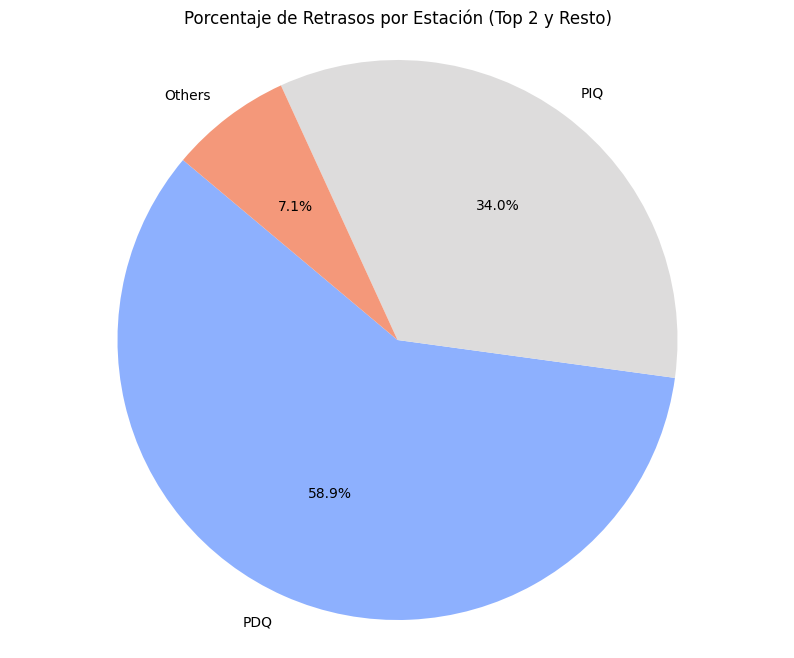

0         58.949136
1         33.997121
Others     7.053743
dtype: float64

In [72]:
# Calcular el porcentaje del resto de las estaciones
station_retrasos_percentage = (station_retrasos["Counts"] / station_retrasos["Counts"].sum()) * 100

# Filtrar las dos estaciones principales
top_2_station_percentages = station_retrasos_percentage.head(2)
top_2_station_names = station_retrasos["Station"].head(2)

# Calcular el porcentaje del resto de las estaciones
rest_station_percentage = station_retrasos_percentage[2:].sum()

# Crear una serie para las dos estaciones principales y el resto
station_pie_data = pd.concat([top_2_station_percentages.reset_index(drop=True), pd.Series({"Others": rest_station_percentage})])
station_names = list(top_2_station_names) + ["Others"]

# Crear el gráfico circular de las estaciones con más retrasos
plt.figure(figsize=(10, 8))
plt.pie(station_pie_data, labels=station_names, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm", len(station_pie_data)))
plt.title("Porcentaje de Retrasos por Estación (Top 2 y Resto)")
plt.axis("equal")
plt.savefig("./Datos/Imagenes/porcentaje_retraso_bases_reparaciones.png")
plt.show()

station_pie_data


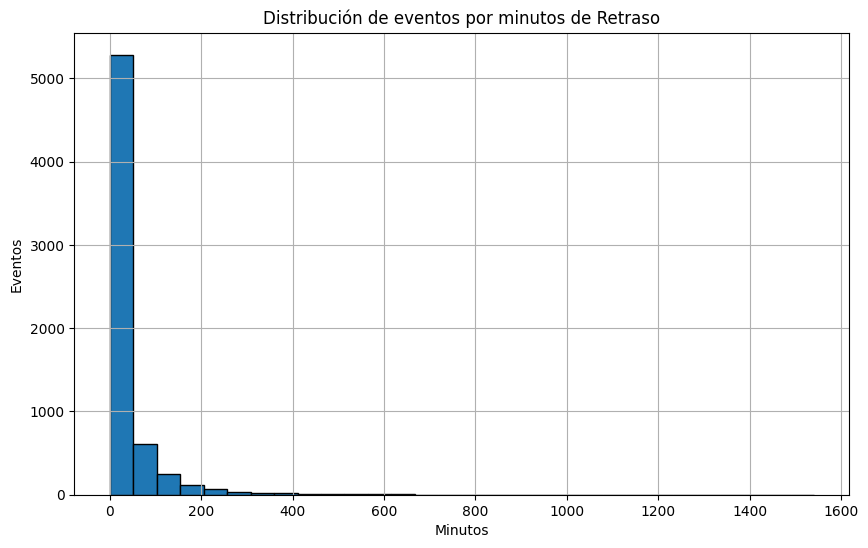

In [ ]:
# Histograma de los valores de Minutos
# El objetivo es identificar cuando tiempo suelen durar más los retrasos por problemas técnicos.


plt.figure(figsize=(10, 6))
plt.hist(eventos_retrasos["Minutos"].dropna(), bins=30, edgecolor="black")
plt.title("Distribución de eventos por minutos de Retraso")
plt.xlabel("Minutos")
plt.ylabel("Eventos")
plt.grid(True)
plt.savefig("./Datos/Imagenes/distribucion_retrasos.png")
plt.show()

# Podemos apreciar que la mayoría de los eventos se duran de 0 a 50 minutos.

   Station   Minutos
14     PDQ  122413.0
15     PIQ   56048.0
8      HOR   11249.0
23     SMA    5771.0
24     TER    4531.0
5      FNC    2622.0
2      CVU    2419.0
17     PNA    1834.0
16     PMI    1719.0
1      AVR    1691.0


C:\Users\Victor\AppData\Local\Temp\ipykernel_9148\2358302914.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_stations["Station"], y=top_10_stations["Minutos"], palette="viridis")


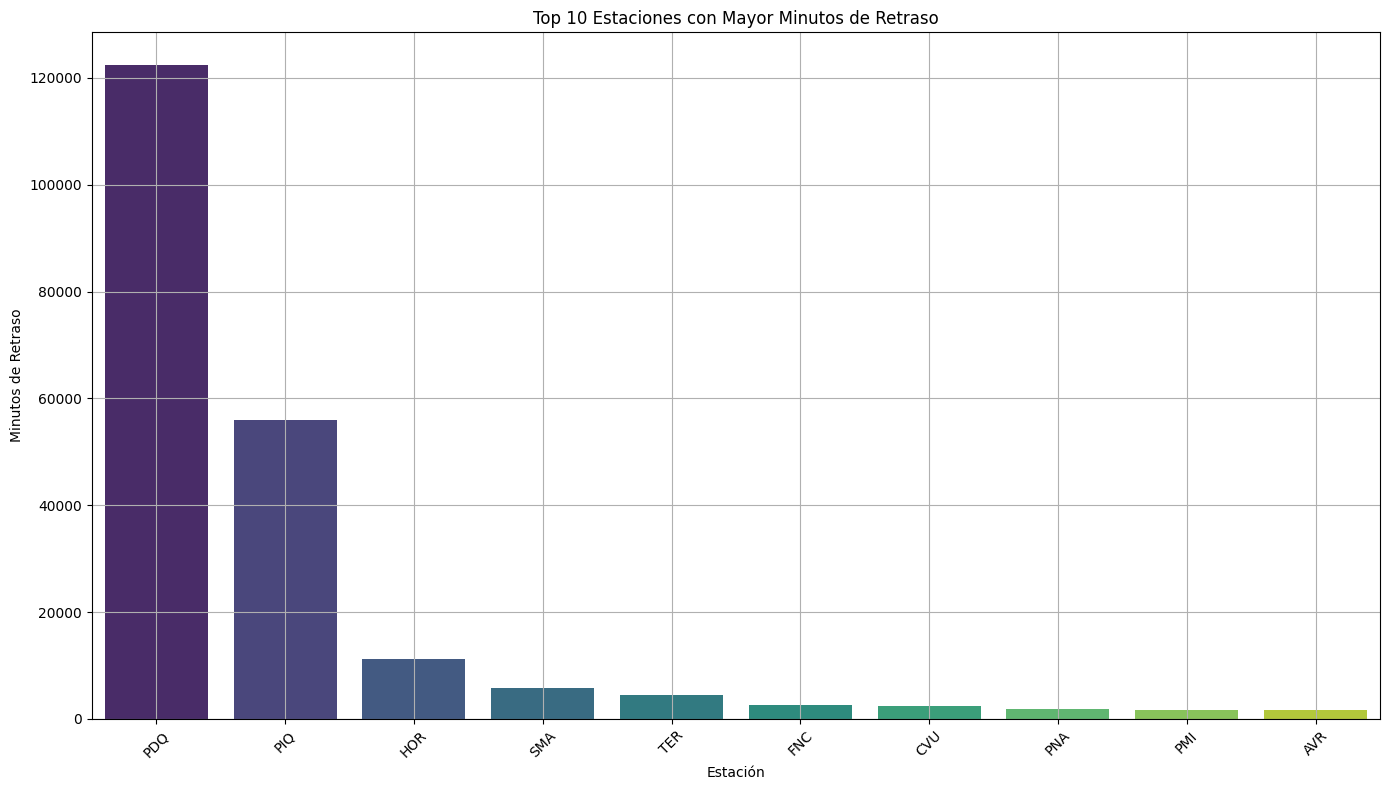

In [77]:
# Asegúrate de que las columnas necesarias están presentes y correctas
eventos_retrasos["AC"] = "avion " + eventos_retrasos["AC"].str[6:]

# Filtrar los datos para estaciones sin valores nulos
stations_data = eventos_retrasos[eventos_retrasos["Station"].notnull()]

# Agrupar los datos por estación y sumar los minutos de retraso
minutos_retraso_por_estacion = stations_data.groupby("Station")["Minutos"].sum().reset_index()

# Ordenar los datos por los minutos de retraso en orden descendente
minutos_retraso_por_estacion = minutos_retraso_por_estacion.sort_values(by="Minutos", ascending=False)

# Mostrar los resultados
print(minutos_retraso_por_estacion.head(10))


# Crear un gráfico de barras con los minutos de retraso por estación
plt.figure(figsize=(14, 8))
top_10_stations = minutos_retraso_por_estacion.head(10)
sns.barplot(x=top_10_stations["Station"], y=top_10_stations["Minutos"], palette="viridis")
plt.title("Top 10 Estaciones con Mayor Minutos de Retraso")
plt.xlabel("Estación")
plt.ylabel("Minutos de Retraso")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("./Datos/Imagenes/top_10_estaciones_minutos_retraso.png")
plt.show()

In [86]:
# Calcular el tiempo medio de minutos de retraso por estación
tiempo_medio_retraso_por_estacion = stations_data.groupby("Station")["Minutos"].mean().reset_index()

# Ordenar los datos por el tiempo medio de retraso en orden descendente
tiempo_medio_retraso_por_estacion = tiempo_medio_retraso_por_estacion.sort_values(by="Minutos", ascending=False)
tiempo_medio_retraso_por_estacion



,Station,Minutos
25,TLS,748.000000
17,PNA,611.333333
22,SID,583.000000
33,ZAZ,382.000000
1,AVR,241.571429
21,SDR,206.333333
20,RMU,197.750000
16,PMI,191.000000
29,VGO,150.000000
0,AGA,147.500000


C:\Users\Victor\AppData\Local\Temp\ipykernel_9148\793252804.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Minutos", y="Station", data=estaciones_interes, palette="viridis")


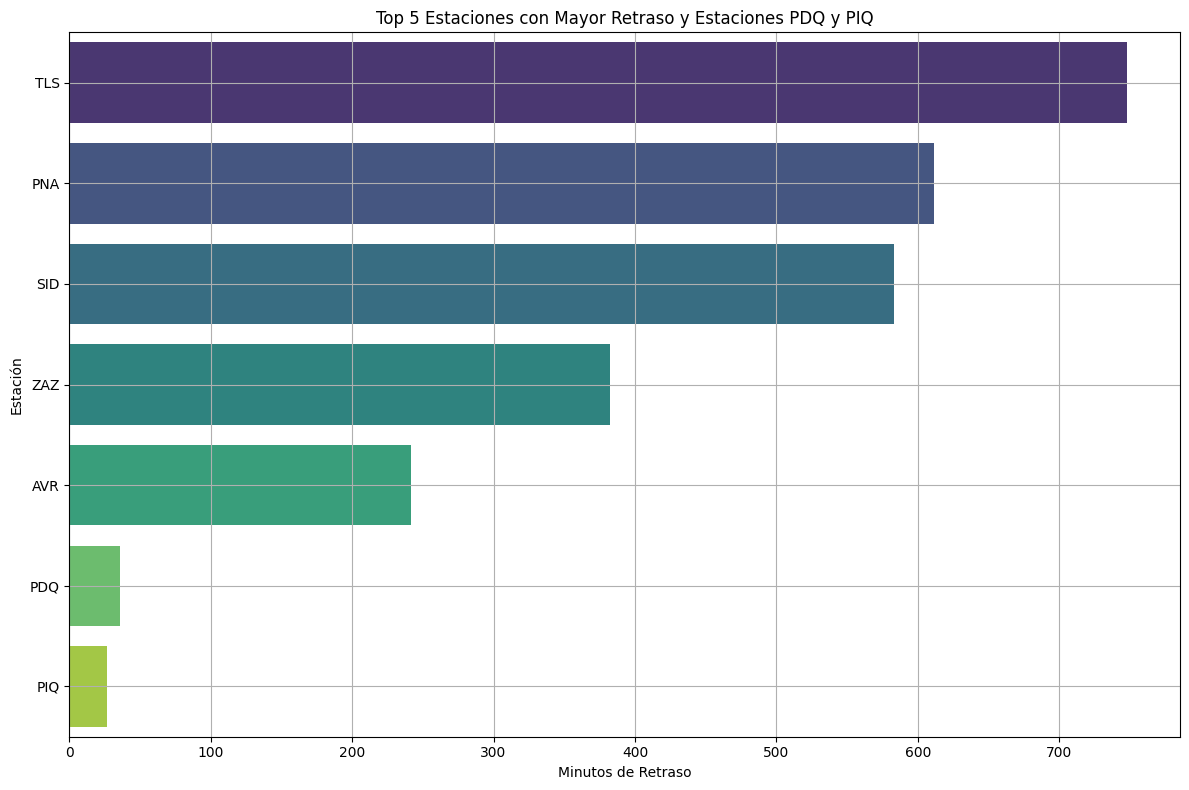

In [84]:
# Calcular el tiempo medio de minutos de retraso por estación
tiempo_medio_retraso_por_estacion = stations_data.groupby("Station")["Minutos"].mean().reset_index()

# Filtrar las estaciones de interés (las 5 primeras y PDQ y PIQ)
estaciones_top5 = tiempo_medio_retraso_por_estacion.sort_values(by="Minutos", ascending=False).head(5)
estaciones_piq_pdq = tiempo_medio_retraso_por_estacion[tiempo_medio_retraso_por_estacion["Station"].isin(["PDQ", "PIQ"])]

# Concatenar las estaciones de interés en un solo DataFrame
estaciones_interes = pd.concat([estaciones_top5, estaciones_piq_pdq])

# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 8))
sns.barplot(x="Minutos", y="Station", data=estaciones_interes, palette="viridis")
plt.title("Top 5 Estaciones con Mayor Retraso y Estaciones PDQ y PIQ")
plt.xlabel("Minutos de Retraso")
plt.ylabel("Estación")
plt.grid(True)
plt.tight_layout()
plt.savefig("./Datos/Imagenes/estaciones_retraso_horizontal.png")
plt.show()

In [78]:
minutos_retraso_por_estacion.sum()

Station    PDQPIQHORSMATERFNCCVUPNAPMIAVRZAZTLSSDRFLWMADR...
Minutos                                             221036.0
dtype: object

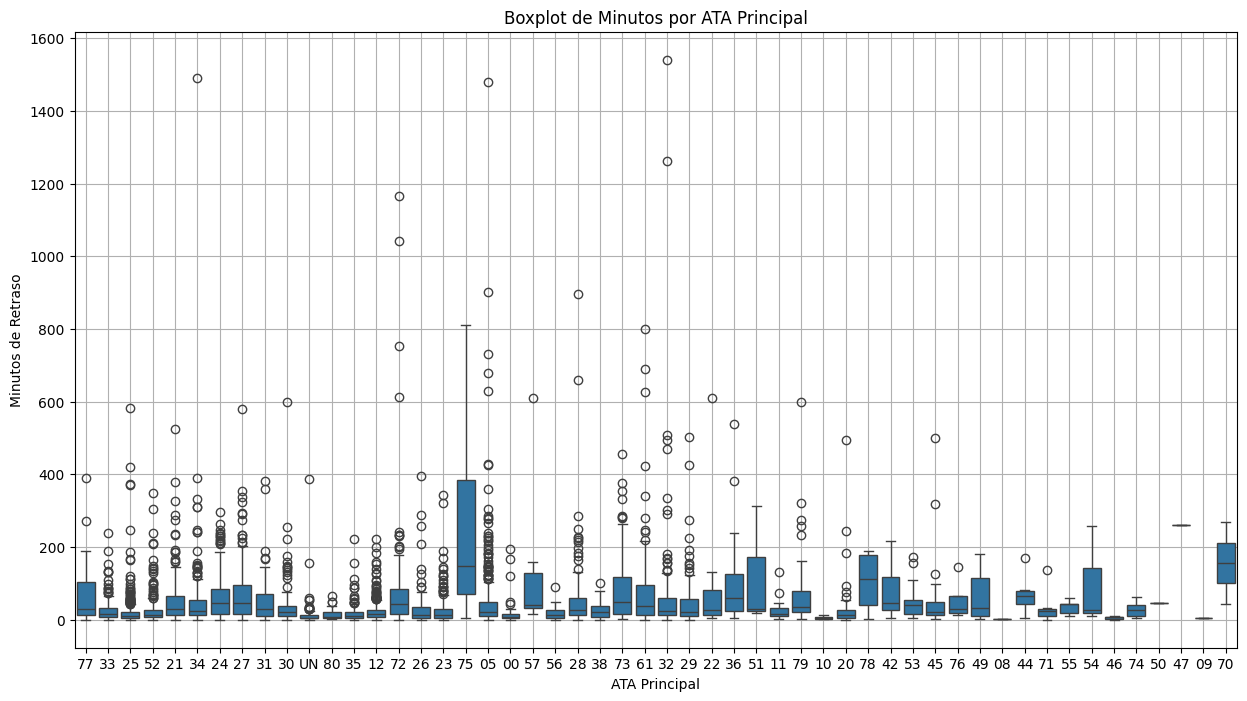

'\nEl boxplot de los minutos de retraso por cada ATA principal proporciona varias conclusiones importantes sobre la distribución de los tiempos de retraso asociados con cada código ATA principal:\n\nMediana de Retraso:\n\nLa línea dentro de cada caja representa la mediana (percentil 50) de los minutos de retraso para cada código ATA. Esto da una idea del retraso típico para cada código.\nRango Intercuartílico (IQR):\n\nLa caja abarca desde el primer cuartil (percentil 25) hasta el tercer cuartil (percentil 75). Esto muestra la dispersión central de los datos y dónde se concentra el 50% de los retrasos.\nCódigos ATA con cajas más grandes tienen una mayor variabilidad en sus retrasos.\nValores Atípicos:\n\nLos puntos fuera de los "bigotes" del boxplot se consideran valores atípicos. Estos puntos indican retrasos que son significativamente diferentes del resto de los datos.\nAlgunos códigos ATA tienen más valores atípicos, lo que sugiere que pueden estar asociados con eventos de retraso e

In [63]:
# Analizar tiempo de retraso en general

# Boxplot de Minutos por ATA 
plt.figure(figsize= (15, 8))
sns.boxplot(data = sinnulos, x= "ATA Principal", y ="Minutos")
plt.title("Boxplot de Minutos por ATA Principal")
plt.xlabel("ATA Principal")
plt.ylabel("Minutos de Retraso")
plt.grid(True)
plt.savefig("./Datos/Imagenes/boxplots_minutos_ata.png")
plt.show()

#Aquí tenemos un boxplot de los minutos de retraso por ATA
'''
El boxplot de los minutos de retraso por cada ATA principal proporciona varias conclusiones importantes sobre la distribución de los tiempos de retraso asociados con cada código ATA principal:

Mediana de Retraso:

La línea dentro de cada caja representa la mediana (percentil 50) de los minutos de retraso para cada código ATA. Esto da una idea del retraso típico para cada código.
Rango Intercuartílico (IQR):

La caja abarca desde el primer cuartil (percentil 25) hasta el tercer cuartil (percentil 75). Esto muestra la dispersión central de los datos y dónde se concentra el 50% de los retrasos.
Códigos ATA con cajas más grandes tienen una mayor variabilidad en sus retrasos.
Valores Atípicos:

Los puntos fuera de los "bigotes" del boxplot se consideran valores atípicos. Estos puntos indican retrasos que son significativamente diferentes del resto de los datos.
Algunos códigos ATA tienen más valores atípicos, lo que sugiere que pueden estar asociados con eventos de retraso extremos.
Bigotes:

Los bigotes se extienden hasta 1.5 veces el IQR desde los cuartiles. Esto incluye la mayoría de los datos y ayuda a identificar la extensión general de los retrasos.
Conclusiones Específicas:
Código ATA 05:

Parece tener una mediana relativamente baja comparada con otros códigos, indicando retrasos menores típicamente.
Tiene una caja más compacta, sugiriendo menos variabilidad en los retrasos.
Código ATA 12:

Presenta una mediana más alta que 05 y una caja más grande, indicando más variabilidad.
También muestra varios valores atípicos, lo que indica que puede tener algunos retrasos extremos.
Código ATA 25 y 52:

Tienen medianas y rangos intercuartílicos intermedios. Sin embargo, 52 parece tener menos valores atípicos comparado con 25.
Código ATA 24:

Muestra una mediana más baja pero tiene una mayor dispersión en la parte superior, indicando que aunque los retrasos típicos son menores, puede haber eventos de retraso más significativos ocasionalmente.
Implicaciones Prácticas:
Gestión de Mantenimiento:

Los códigos ATA con medianas más altas y mayores IQRs pueden necesitar una atención más cuidadosa y proactiva para reducir los tiempos de retraso.
Planificación Operacional:

Los valores atípicos significativos deben ser analizados más a fondo para entender y mitigar las causas de estos retrasos extremos.
Políticas de Intervención:

Códigos ATA con menos variabilidad (como 05) pueden estar bien gestionados, pero aún se deben revisar los procedimientos para los códigos con más valores atípicos para mejorar la consistencia.
Este análisis inicial del boxplot proporciona una visión clara de dónde se concentran los retrasos y qué áreas podrían necesitar atención adicional para mejorar la puntualidad de las operaciones.
'''


In [64]:
# Información de los Outliers más representativos
'''
ATA 05 - Tareas de mantenimiento programados. 
Observaciones:
Los valores atípicos de este grupo muestran que aunque la mayoría de los retrasos son menores, hay algunos eventos que causan retrasos significativos.
Los outliers pueden representar fallas graves o eventos inusuales que requieren más tiempo planeado para una reparación. 
ATA 12 - Servicing - Necesidad de recargas los sistemas de líquidos, gases o elementos de desgaste como ruedas o frenos. Pueden ser en mantenimientos programados o no.
Observaciones:
Este grupo presenta una cantidad notable de outliers, indicando que además de los retrasos típicos, hay varios eventos extremos.
Estos outliers pueden ser causados por problemas complejos o recurrentes que no se resuelven fácilmente.
ATA 25 - Defectos en interiores del avión
Observaciones:
Tiene varios outliers, lo que sugiere que aunque la mayoría de los retrasos son manejables, hay incidentes ocasionales que causan grandes retrasos.
Podría ser útil investigar estos casos para identificar patrones comunes o causas subyacentes.
ATA 24 - Eléctricos
Observaciones:
Este grupo tiene una dispersión significativa de outliers hacia los retrasos más largos, lo que puede indicar problemas intermitentes pero severos.
Estos eventos extremos podrían estar relacionados con fallas críticas que afectan significativamente la operación.
ATA 52 - Puertas
Observaciones:
Similar a 25, este grupo tiene outliers que representan retrasos mucho mayores que la mediana.
Los outliers aquí pueden indicar fallas técnicas específicas que causan estos retrasos extendidos.
'''

'\nATA 05 - Tareas de mantenimiento programados. \nObservaciones:\nLos valores atípicos de este grupo muestran que aunque la mayoría de los retrasos son menores, hay algunos eventos que causan retrasos significativos.\nLos outliers pueden representar fallas graves o eventos inusuales que requieren más tiempo planeado para una reparación. \nATA 12 - Servicing - Necesidad de recargas los sistemas de líquidos, gases o elementos de desgaste como ruedas o frenos. Pueden ser en mantenimientos programados o no.\nObservaciones:\nEste grupo presenta una cantidad notable de outliers, indicando que además de los retrasos típicos, hay varios eventos extremos.\nEstos outliers pueden ser causados por problemas complejos o recurrentes que no se resuelven fácilmente.\nATA 25 - Defectos en interiores del avión\nObservaciones:\nTiene varios outliers, lo que sugiere que aunque la mayoría de los retrasos son manejables, hay incidentes ocasionales que causan grandes retrasos.\nPodría ser útil investigar es

In [65]:
# Identificar los 5 ATA con la mayor cantidad de Outliers

# Outliers usando IQR para identificarlos
def identify_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers = identify_outliers(sinnulos, "Minutos")

# Identificar los 5 ATAs con la mayor cantidad de outliers
top_5_ata_outliers = outliers["ATA Principal"].value_counts().head(5).index

# Filtrar los outliers para estos 5 ATA principales
outliers_top_5 = outliers[outliers["ATA Principal"].isin(top_5_ata_outliers)]

# Agrupar outliers por 'ATA Principal' de los top 5
outliers_top_5_by_ata = outliers_top_5.groupby("ATA Principal")["Minutos"].describe()

outliers_top_5_by_ata


,count,mean,std,min,25%,50%,75%,max
ATA Principal,,,,,,,,
05,45.0,272.244444,254.701622,112.0,140.00,183.0,276.0,1481.0
21,33.0,176.454545,91.613690,106.0,120.00,140.0,187.0,524.0
24,50.0,161.440000,49.256579,106.0,123.25,139.0,201.5,296.0
27,37.0,196.216216,93.579774,106.0,144.00,164.0,225.0,581.0
61,29.0,245.862069,174.291776,117.0,151.00,189.0,241.0,799.0


In [ ]:
# Análisis:
'''
ATA 05: Tareas de mantenimiento programados. 
La gran desviación estándar y el valor máximo indican que hay varios eventos de retraso extremadamente largos, se pueden deben a inoperatividad por falta de repuestos.

ATA - 21: Aire Acondicionado
Aunque tiene menos outliers que 05, la media sigue siendo alta, indicando retrasos significativos.

ATA - 24: Sistema eléctrico
Este grupo tiene menos variabilidad en los retrasos extremos, pero aún representa un problema notable.

ATA - 27: Control de vuelo
Los retrasos son comparables a los de 21 y 61, con eventos que pueden ser muy prolongados.

ATA - 61: Hélices
La alta desviación estándar y el valor máximo indican retrasos muy variables y algunos extremadamente largos.

Posibles mejoras:
Revisar y mejorar los procedimientos de mantenimiento y reparación para minimizar los retrasos asociados con estos ATAs.
Implementar un sistema de monitorización continua para estos ATAs
'''

'\nATA 05: Tareas de mantenimiento programados. \nLa gran desviación estándar y el valor máximo indican que hay varios eventos de retraso extremadamente largos, se pueden deben a inoperatividad por falta de repuestos.\n\nATA - 21: Aire Acondicionado\nAunque tiene menos outliers que 05, la media sigue siendo alta, indicando retrasos significativos.\n\nATA - 24: Sistema eléctrico\nEste grupo tiene menos variabilidad en los retrasos extremos, pero aún representa un problema notable.\n\nATA - 27: Control de vuelo\nLos retrasos son comparables a los de 21 y 61, con eventos que pueden ser muy prolongados.\n\nATA - 61: Hélices\nLa alta desviación estándar y el valor máximo indican retrasos muy variables y algunos extremadamente largos.\n\nPosibles mejoras:\nRevisar y mejorar los procedimientos de mantenimiento y reparación para minimizar los retrasos asociados con estos ATAs.\nImplementar un sistema de monitorización continua para estos ATAs\n'

In [ ]:
# Vamos a identificar los retrasos con más de 400 minutos y saber que flota de aviones CD o MD tiene mayor cantidad de retrasos
# Filtrar los outliers que están por encima de los 400 minutos
outliers_above_400 = outliers[outliers["Minutos"] > 400]

# Mostrar los datos de estos outliers
outliers_above_400


,ID,Occurred,At,AC,Station,Headline,FlightNo,ATA,Minutos,ATA Principal,Year
345,16435,2021-07-18,06:55:00,avion 15,PIQ,HYD LEAK ON ENG #1,5550,29-11,427.0,29,2021
422,16989,2021-07-31,23:53:00,avion 24,PDQ,IMPACTO RAYOS,NaN,05-51,679.0,05,2021
534,17924,2021-08-24,08:09:00,avion 33,PIQ,HI FLOW LIGHT(NO LIGHT),PM468,20-45,495.0,20,2021
776,20554,2021-10-22,13:09:00,avion 6,PDQ,CAMBIO ENG2,NT5601,72-00,612.0,72,2021
971,23928,2022-01-04,11:02:00,avion 15,PDQ,ENGINE#1 ITT RISES TO 946ÂºC,9300,72-40,1167.0,72,2022
972,23950,2022-01-05,02:19:00,avion 12,PIQ,AILERON POWER CONTROL UNIT,NaN,05-20,902.0,05,2022
981,24018,2022-01-07,02:43:00,avion 6,PDQ,C/B REFUELING 1 (OUT) (NO RESET) REFUELING PAN...,NT6604,28-23,895.0,28,2022
1304,26936,2022-03-23,00:51:00,avion 6,NaN,FUGA COMBUSTIBLE PLANO DERECHO,NT5451,28-10,661.0,28,2022
1906,32171,2022-07-22,10:46:00,avion 6,PDQ,NOSE LANDING GEAR,NaN,32-21,1541.0,32,2022
1932,32354,2022-07-26,06:24:00,avion 1,PDQ,0111039/1,NaN,73-21,455.0,73,2022


In [ ]:
# Por último pero no menos importante vamos a identificar que porcentaje representan los vuelos con retrasos en el computo global de todos los vuelos realizados por la compañia.

#Para ello vamos a usar la tabla hist vuelos y la vamos a cruzar eventos_retrasos

In [ ]:
'''
#6 , 12, 15 , 24, 32 , 43, 44, 45, 46
# Lista de aviones 'MD'
aviones_md = ["Avion 6", "Avion 12", "Avion 15", "Avion 24", "Avion 32", "Avion 43", "Avion 44", "Avion 45", "Avion 46"]

# Actualizar la columna 'Flota' a 'MD' donde la columna 'AC' está en la lista de aviones 'MD'
outliers_above_400.loc[outliers_above_400['AC'].isin(aviones_md), 'Flota'] = 'MD'

# Luego asignar 'MD' a los aviones específicos
outliers_above_400.loc[outliers_above_400['AC'].isin(aviones_md), 'Flota'] = 'MD'

# Mostrar los cambios para verificar
print(outliers_above_400[['AC', 'Flota']])
'''

'\n#6 , 12, 15 , 24, 32 , 43, 44, 45, 46\n# Lista de aviones \'MD\'\naviones_md = ["Avion 6", "Avion 12", "Avion 15", "Avion 24", "Avion 32", "Avion 43", "Avion 44", "Avion 45", "Avion 46"]\n\n# Actualizar la columna \'Flota\' a \'MD\' donde la columna \'AC\' está en la lista de aviones \'MD\'\noutliers_above_400.loc[outliers_above_400[\'AC\'].isin(aviones_md), \'Flota\'] = \'MD\'\n\n# Luego asignar \'MD\' a los aviones específicos\noutliers_above_400.loc[outliers_above_400[\'AC\'].isin(aviones_md), \'Flota\'] = \'MD\'\n\n# Mostrar los cambios para verificar\nprint(outliers_above_400[[\'AC\', \'Flota\']])\n'

In [ ]:
#POR ÚLTIMO SACAR EL HISTÓRICO DE VUELOS POR AÑO Y COMPARAR CON LAS ATA QUE MÁS SE REPITE POR AÑO